In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
def get_data(filename):
    with open(filename) as f:
        return [list(ln.strip()) for ln in f.readlines()]


# data = get_data('test')
data = get_data("input")
matrix = np.matrix(data, dtype=np.int8)


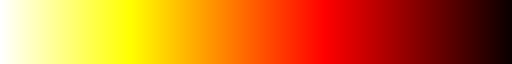

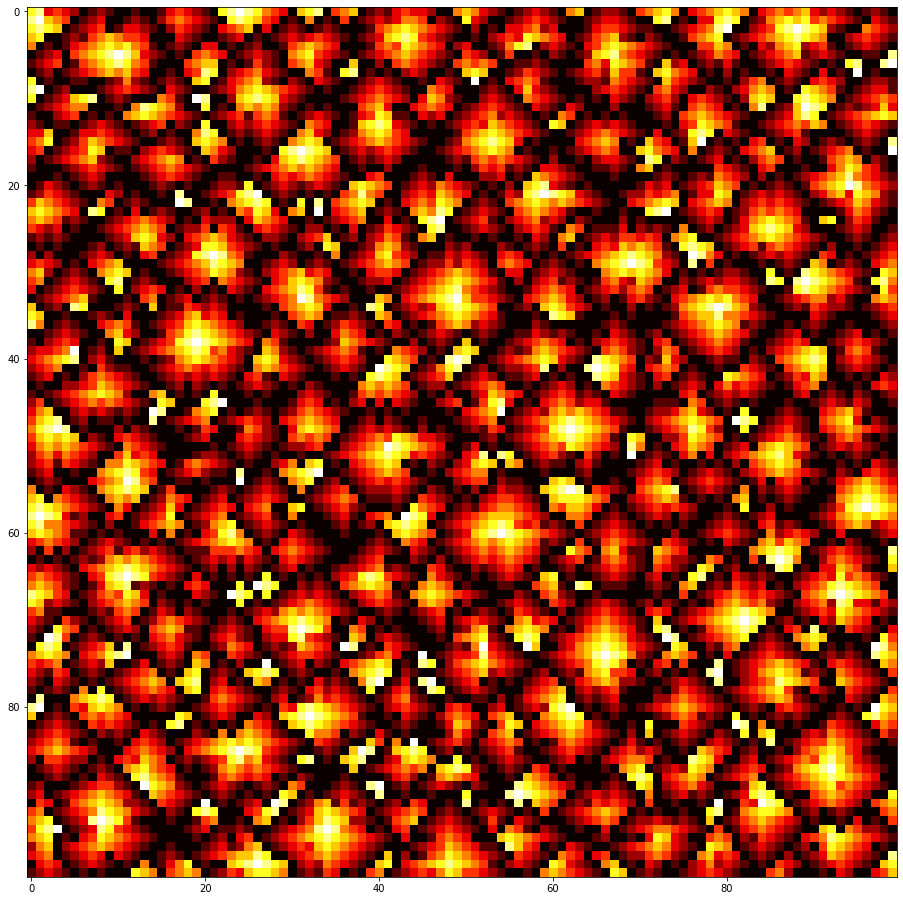

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 16)

ax.imshow(matrix, cmap="hot_r", interpolation="nearest")
plt.get_cmap("hot_r")


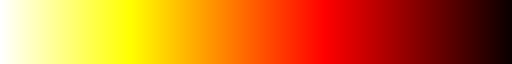

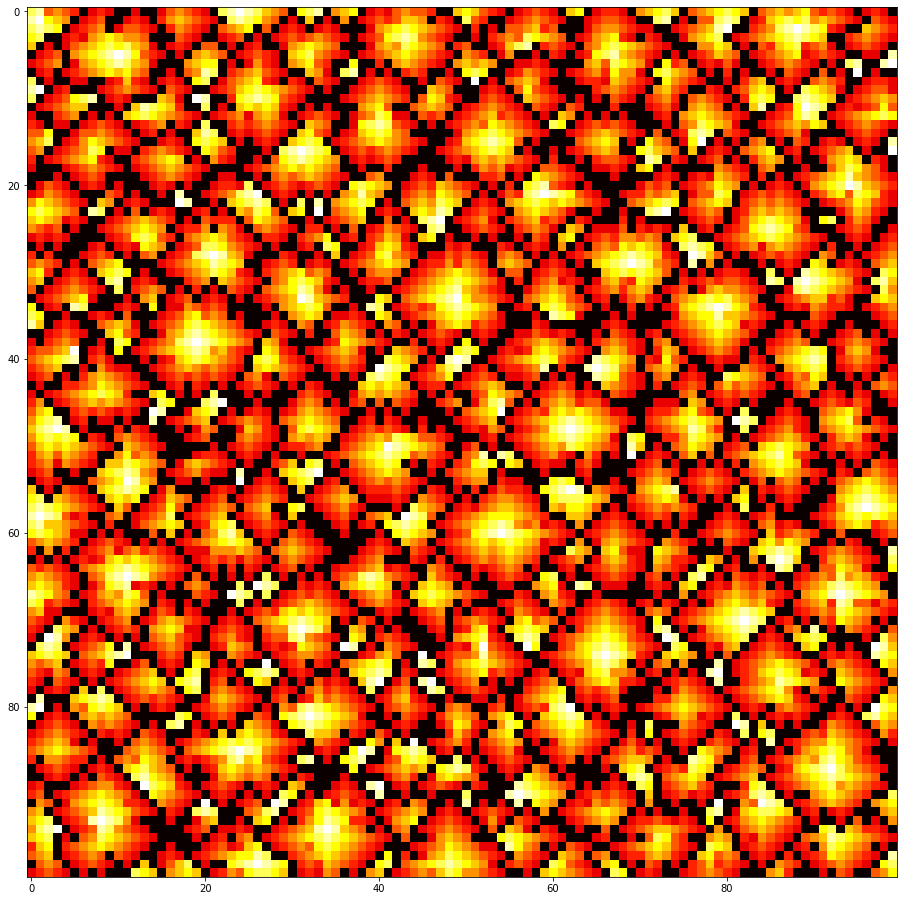

In [4]:
new_m = matrix.copy()
new_m[np.where(matrix == 9)] = 12
fig, ax = plt.subplots()
fig.set_size_inches(16, 16)

ax.imshow(new_m, cmap="hot_r", interpolation="nearest")
plt.get_cmap("hot_r")


In [5]:
def get_neighbors(x, y, lim_x, lim_y):
    return [
        x - 1 if x - 1 >= 0 else None,
        x + 1 if x + 1 < lim_x else None,
        y - 1 if y - 1 >= 0 else None,
        y + 1 if y + 1 < lim_y else None,
    ]


def is_valley(x, y):
    global matrix
    north_coord, south_coord, west_coord, east_coord = get_neighbors(
        x, y, *matrix.shape
    )
    tmp = []
    for dx in [north_coord, south_coord]:
        if dx != None:
            tmp.append(matrix[dx, y])
    for dy in [west_coord, east_coord]:
        if dy != None:
            tmp.append(matrix[x, dy])
    return all(tmp > matrix[x, y])


In [6]:
dx, dy = np.array(get_neighbors(1, 0, *matrix.shape)).reshape(2, 2)


In [7]:
len_x, len_y = matrix.shape
vallies = []
for x in range(len_x):
    for y in range(len_y):
        if is_valley(x, y):
            # print(x,y, matrix[x,y])
            vallies.append(matrix[x, y])

(np.array(vallies) + 1).sum()


504

In [8]:
matrix_2 = np.zeros(matrix.shape, dtype=np.int8)
for x in range(len_x):
    for y in range(len_y):
        if is_valley(x, y):
            # print(x,y, matrix[x,y])
            matrix_2[x,y] = 1
            # vallies.append(matrix[x, y])


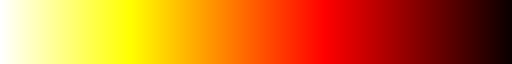

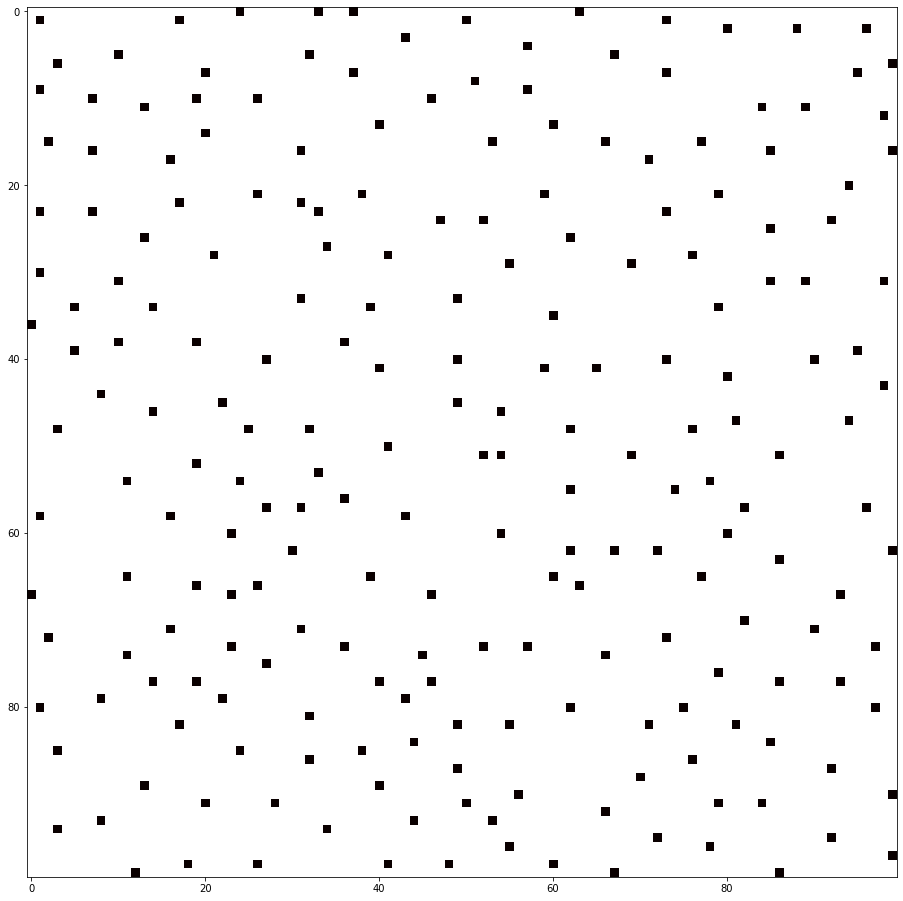

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 16)

ax.imshow(matrix_2, cmap="hot_r", interpolation="nearest")
plt.get_cmap("hot_r")


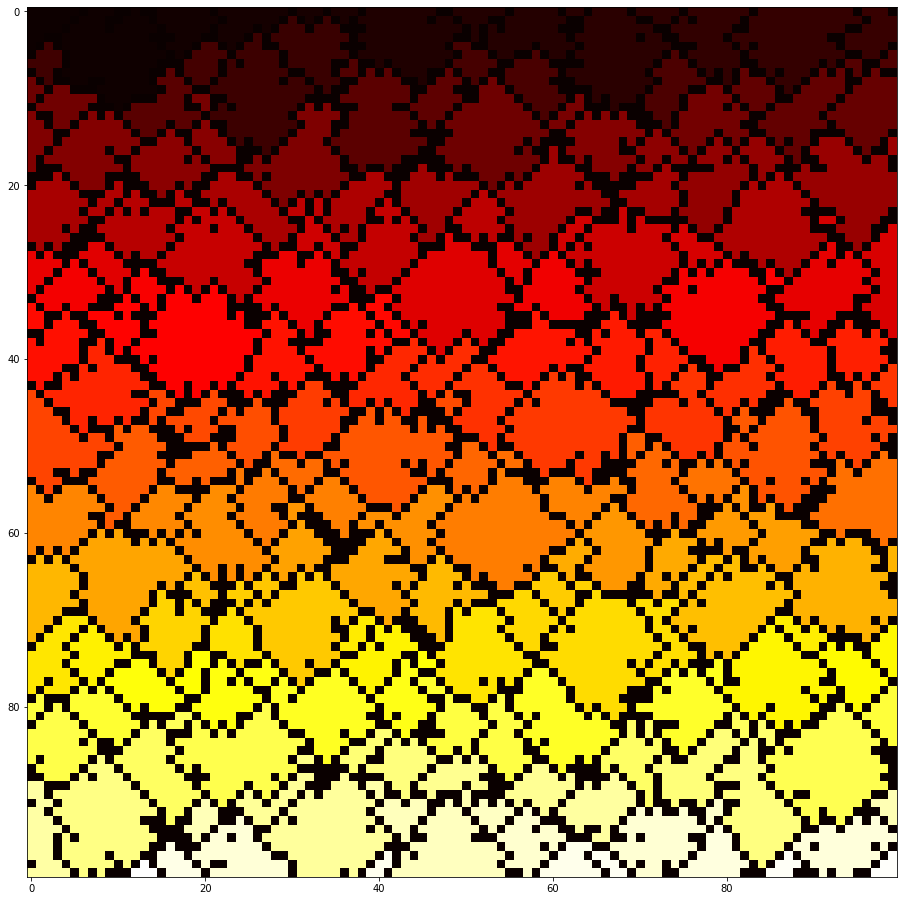

In [10]:
from scipy import ndimage
m, l = ndimage.label(matrix < 9)
ax = plt.imshow(m, cmap='hot')
ax.figure.set_size_inches(16,16)
# m

In [11]:
np.prod(sorted(np.bincount(m.ravel())[1:])[-3:])

1558722